1. Import scipy.stats in order to access the scipy.stats.beta distribution. Using the cdf method of scipy.stats.beta deine a function called beta_measure which will take two arguments a, b and which will return the probability mass of the interval [a, b] under the probability measure Beta (3, 7), i.e. Beta (3, 7) ([a, b])
 Test your function by printing the result of: 
 
(a) beta_measure(0,1)

(b) beta_measure(0,0)

(c) beta_measure(0.25,0.75)

(d) beta_measure(0,0.5) (e) beta_measure(0.5,1)

Plot the pdf of Beta (3, 7) to check visually if your answers make sense.

In [27]:
#import require libraries
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import laplace
from scipy.stats import probplot
import pylab

In [4]:
#define beta measure function  
def beta_measure(a,b):
    x = beta.cdf([a,b],3,7) #probability calculation
    return x[1] - x[0] #calculate probability mass
    #returns probability mass of interval

In [5]:
#a
a =beta_measure(0,1)
#b 
b = beta_measure(0,0)
#c
c = beta_measure(0.25,0.75)
#(d) 
d =beta_measure(0,0.5)
#e
e = beta_measure(0.5,1)

print(f" The probability mass for 0,1 is {a}")
print(f" The probability mass 0,0 is {b}")
print(f" The probability mass 0.25,0.75 is {c}")
print(f" The probability mass for 0,1 is {d}")
print(f" The probability mass for 0,1 is {e}")

 The probability mass for 0,1 is 1.0
 The probability mass 0,0 is 0.0
 The probability mass 0.25,0.75 is 0.599334716796875
 The probability mass for 0,1 is 0.91015625
 The probability mass for 0,1 is 0.08984375


In [6]:
beta37 = [a,b,c,d,e]
#populate results into array 
beta37

[1.0, 0.0, 0.599334716796875, 0.91015625, 0.08984375]

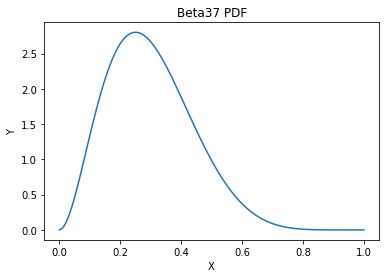

In [7]:
#plot PDF 
x = np.linspace (0,1,100)
y = beta.pdf(x,3,7)
plt.title("Beta37 PDF")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x,y)

The PDF is the derivative of the CDF meaning that the CDF is the intergral of the PDf, this is supported by the results from the intergration of the PDF matching the results  of the function defined and created in question 1. 


# Question 2

Using the pdf method of scipy.stats.beta deine a function called beta_pdf which will take one argument x and return the pdf of the probability measure Beta (3, 7) evaluated at x. Import the integration routine quad from scipy.integrate. Use quad to compute and print the following integrals

(a) 1 beta_pdf(x) dx 0

(b) 0 beta_pdf(x) dx 0

(c) 3/4 beta_pdf(x) dx 1/4

(d) 1/2 beta_pdf(x) dx 0

(e) 1 beta_pdf(x) dx 1/2



In [8]:
from scipy import integrate
#define beta function using pdf method taking argument x
def beta_pdf(x):
    return beta.pdf(x,3,7)
#calculate probability mass and print CDF
a = integrate.quad(beta_pdf,0,1 )
print(a[0])
#b 
b = integrate.quad(beta_pdf,0,0 )
print(b[0])
#c
c = integrate.quad(beta_pdf,0.25,0.75 )
print(c[0])
#(d) 
d = integrate.quad(beta_pdf,0,0.5 )
print(d[0])
#e
e = integrate.quad(beta_pdf,0.5,1 )
print(e[0])

beta37_2 = [a,b,c,d,e]

x = 0



1.0
0.0
0.5993347167968751
0.9101562499999999
0.08984374999999997


# Question 3
3. Recall from the lectures that if a probability distribution d1 has density f1 and a probability distribution d2 has density f2, then the density of the sum d1 +d2 is given by the convolution of the two densities, viz.
Write a function which implements the integrand of the integral above, that is to say that implements f1 (x)f2 (t − x), where f1 is the density of Beta (3, 7) and f2 is the density of Beta (7, 3). (Hint: this function will need two arguments.)
Next, generate 100 points (t1, . . . , t100) along the support of Beta (3, 7) + Beta (7, 3) (using numpy's linspace function), and using a for loop, compute the pdf f1+2(ti) at these 100 points using quad. (Hint: the documentation of quad has an example showing how to integrate a function with two arguments along its 􏰀rst argument.) Plot your result.
Finally, generate 10000 samples from Beta (3, 7), 10000 samples from Beta (7, 3) independently, add them, and plot the histogram of these sums along with the pdf computed in the previous step. What do you observe?

In [9]:
#define beta function for PDF's for 3,7 and 7,3
def beta_pdfA(x):
    pdfA = beta.pdf(x,3,7)
    return pdfA

def beta_pdfB(x):
    pdfB = beta.pdf(x,7,3)
    return pdfB
    
#define interrand function
def intergrand(x, f1, f2, t):
    return(f1(x)*f2(t-x))

In [11]:
#generate values between 0 and 2
t_values = np.linspace(0,2,100)
results = []
#integrate loop to populate empty list
for t in t_values:
    pdf12t = integrate.quad(intergrand, 0 ,2, args = (beta_pdfA, beta_pdfB, t))[0]
    print(pdf12t)
    results.append(pdf12t) #appending to list
    


0.0
7.877306756648536e-14
6.953875697935422e-11
2.2351644345551265e-09
2.845671855137813e-08
1.9821228161985785e-07
9.555209830535592e-07
3.572327583034246e-06
1.1085871164125421e-05
2.9834874636324073e-05
7.174688648590836e-05
0.0001574950143136613
0.00032058950047012506
0.0006124017379508888
0.0011080400043001852
0.0019129123056488432
0.003169727264710335
0.005065603789829974
0.007838888708299834
0.011785222635992576
0.017262351293904684
0.02469315533746064
0.034566367293460576
0.04743446411265862
0.06390826355642248
0.08464781840326539
0.11034928988586029
0.14172759190409198
0.1794947293798766
0.2243339061141906
0.2768696484060597
0.3376343787659589
0.4070320778982375
0.4852998905050872
0.5724687602923931
0.668324420069007
0.7723703114960362
0.8837942650422569
1.0014410392883388
1.1237930719315068
1.2489620880695873
1.374694466547255
1.4983935524554912
1.6171623811111695
1.7278705570873536
1.8272493137041335
1.9120190595095352
1.9790539996796324
2.0255887020942867
2.04947175965258
2

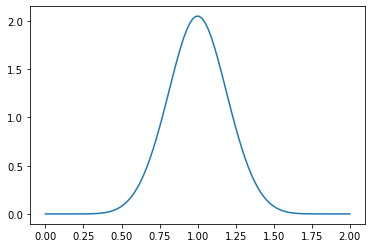

In [12]:
plt.plot(t_values, results) # plot of list results

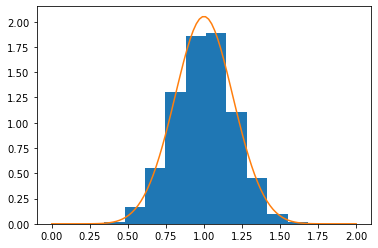

In [13]:
sample_size = 10000
d1 = beta.rvs(3,7, size=sample_size, random_state=20)
d2 = beta.rvs(7,3,size=sample_size,random_state=21)
d3 = d1+d2

plt.hist(d3,density=True)
plt.plot(t_values,results)

From the output of the sum of each beta function I concluded that the data and peak are condensed / reduced and whilst the support increases.

# Question 4

Download the last 10 years of Microsoft stock using
           my_data = data.DataReader(’MSFT’, ’yahoo’, ’2012-11-02’, ’2022-11-02’)
Keep the "Close" column and use it to compute the time series of (percentage) daily returns using the
formula

In [14]:
import pandas_datareader as pdr
my_data = pdr.DataReader('MSFT', 'yahoo', '2012-11-02', '2022-11-02')
#download dataset for use
print(my_data)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2012-11-02   29.770000   29.330000   29.590000   29.500000  57131600.0   
2012-11-05   29.740000   29.330000   29.620001   29.629999  38070800.0   
2012-11-06   30.200001   29.610001   29.820000   29.860001  43401500.0   
2012-11-07   29.830000   29.049999   29.530001   29.080000  57871800.0   
2012-11-08   29.370001   28.799999   29.120001   28.809999  49841800.0   
...                ...         ...         ...         ...         ...   
2022-10-27  233.690002  225.779999  231.039993  226.750000  40424600.0   
2022-10-28  236.600006  226.050003  226.240005  235.869995  40647700.0   
2022-10-31  234.919998  231.149994  233.759995  232.130005  28357300.0   
2022-11-01  235.740005  227.330002  234.600006  228.169998  30592300.0   
2022-11-02  231.300003  220.039993  229.460007  220.100006  38407000.0   

             Adj Close  
Date        

In [15]:
data_close = my_data['Close']
#asiign close column to new variable 
print(data_close)

Date
2012-11-02     29.500000
2012-11-05     29.629999
2012-11-06     29.860001
2012-11-07     29.080000
2012-11-08     28.809999
                 ...    
2022-10-27    226.750000
2022-10-28    235.869995
2022-10-31    232.130005
2022-11-01    228.169998
2022-11-02    220.100006
Name: Close, Length: 2518, dtype: float64


Plot the histogram of daily returns. Find a family of distributions which you think would model this distribution well. (Hint: what is the support of the daily returns? Is it symmetric or skewed? Has it got fat tails/positive excess kurtosis?).

<AxesSubplot:xlabel='Close', ylabel='Count'>

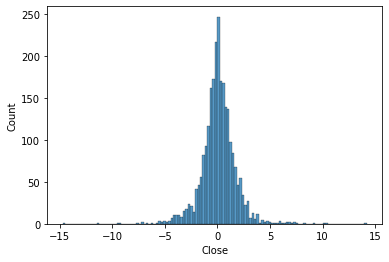

In [19]:
returns_dd = ((data_close/data_close.shift(periods=1))-1) *100
sns.histplot(returns_dd)
#plot histogram of daily returns 

The continuous distributions in scipy.stats have a method called fit which, given some data, computes the Maximum Likelihood Estimators for the parameters of the distribution. Use this method to find the optimal probability distribution in the family you have chosen, and plot the corresponding pdf alongside the histogram of observed daily returns.

In [22]:
q4_x = []
for i in range(1,len(returns_dd)):
    q4_x.append(returns_dd[i])

print(kurtosis(q4_x,fisher= True))

8.807800316907603


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Density'>

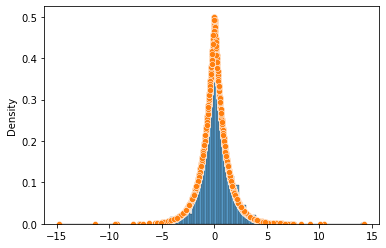

In [29]:
laplace.fit(q4_x)
q4_z = laplace.pdf(q4_x)
sns.histplot(q4_x, stat='density')
sns.scatterplot(q4_x,q4_z)

Finally, plot the QQ plot of the daily returns data versus the model you have just fitted. Comment on the quality of your fit.

<function matplotlib.pyplot.show(close=None, block=None)>

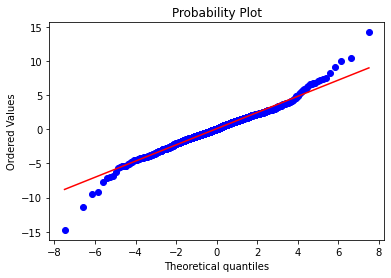

In [30]:
probplot(q4_x, dist="laplace", plot=pylab)
pylab.show

The Kurtosis is greater than 3, this proves a form of normal distribution. The best fit is laplace due to the height of the peak and thickness of the belt in place of using norm. Where both ends skew from the norm of the QQ plot this suggests a fat tail where the center follows he straight line.